🟢 EDA BEFORE PREPROCESSING

Shape: (200, 10)

Data Types:
 Policy_ID            object
Customer_Age          int64
Gender               object
Policy_Type          object
Annual_Income       float64
Claim_History         int64
Fraudulent_Claim      int64
Premium_Amount      float64
Claim_Amount        float64
Risk_Score           object
dtype: object

Missing Values:
 Policy_ID           0
Customer_Age        0
Gender              0
Policy_Type         0
Annual_Income       0
Claim_History       0
Fraudulent_Claim    0
Premium_Amount      0
Claim_Amount        0
Risk_Score          0
dtype: int64


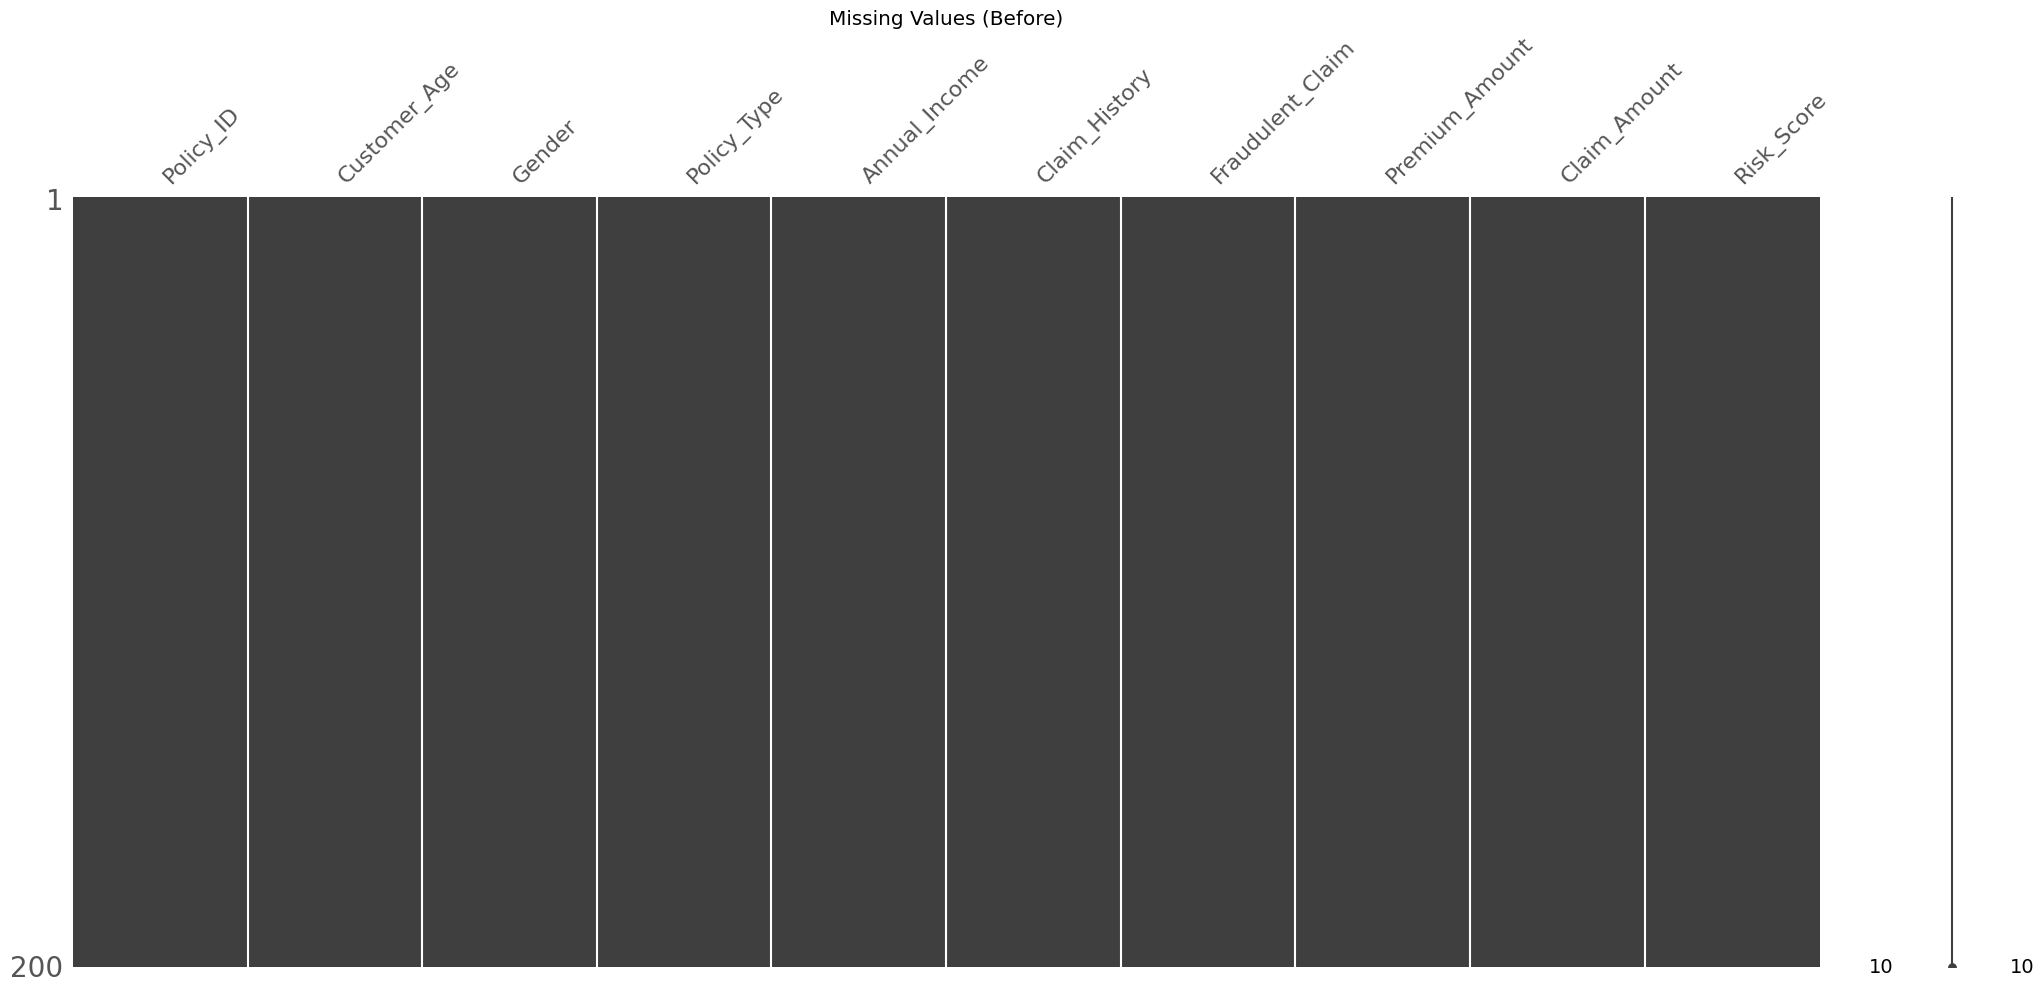

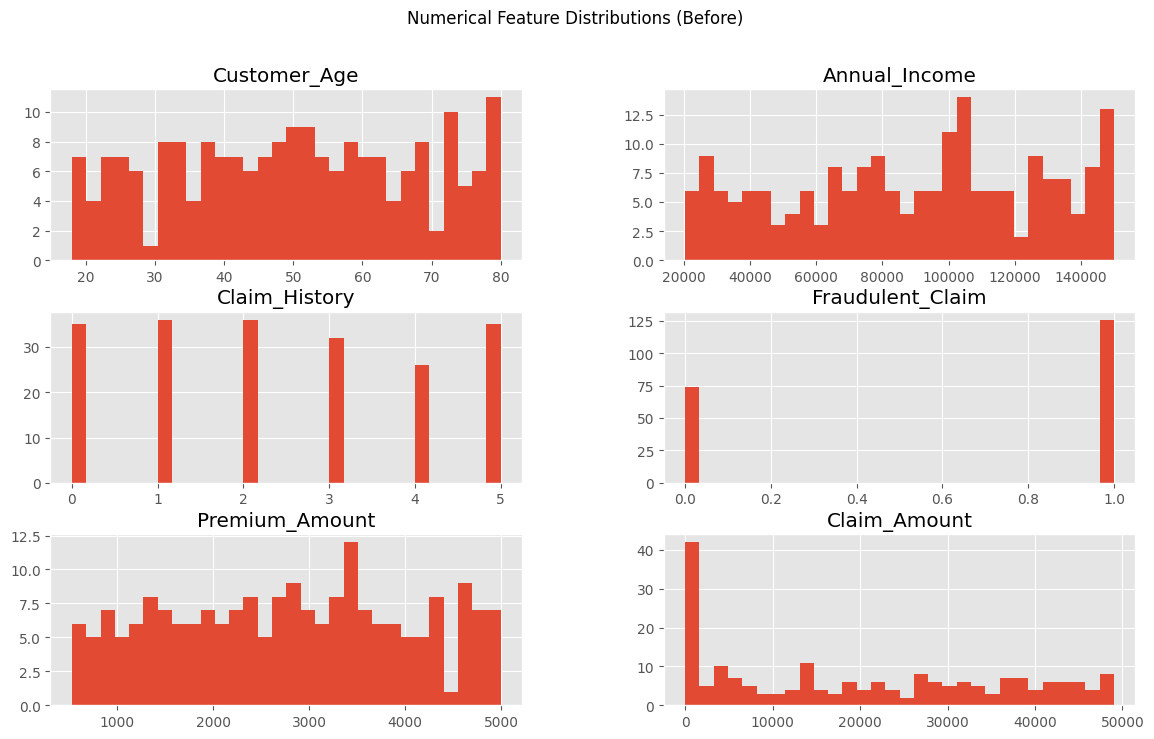

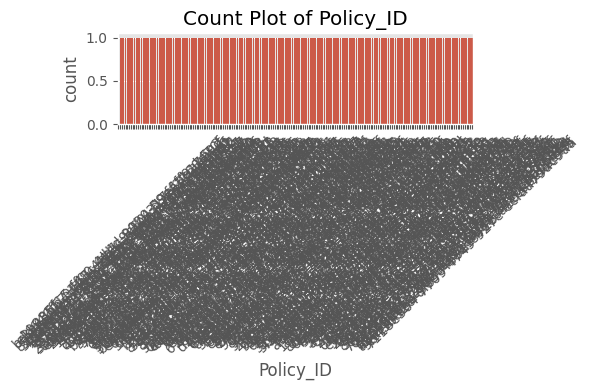

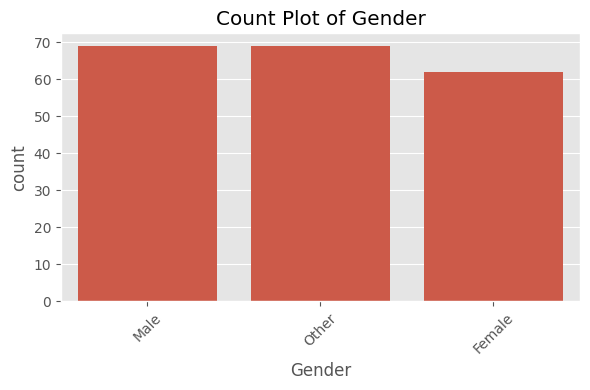

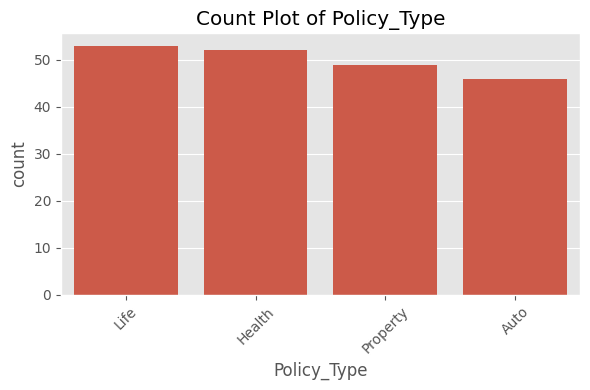


🛠️ PREPROCESSING...

✅ Preprocessing Complete
New Shape: (200, 211)

🟢 EDA AFTER PREPROCESSING

Missing Values After: 0


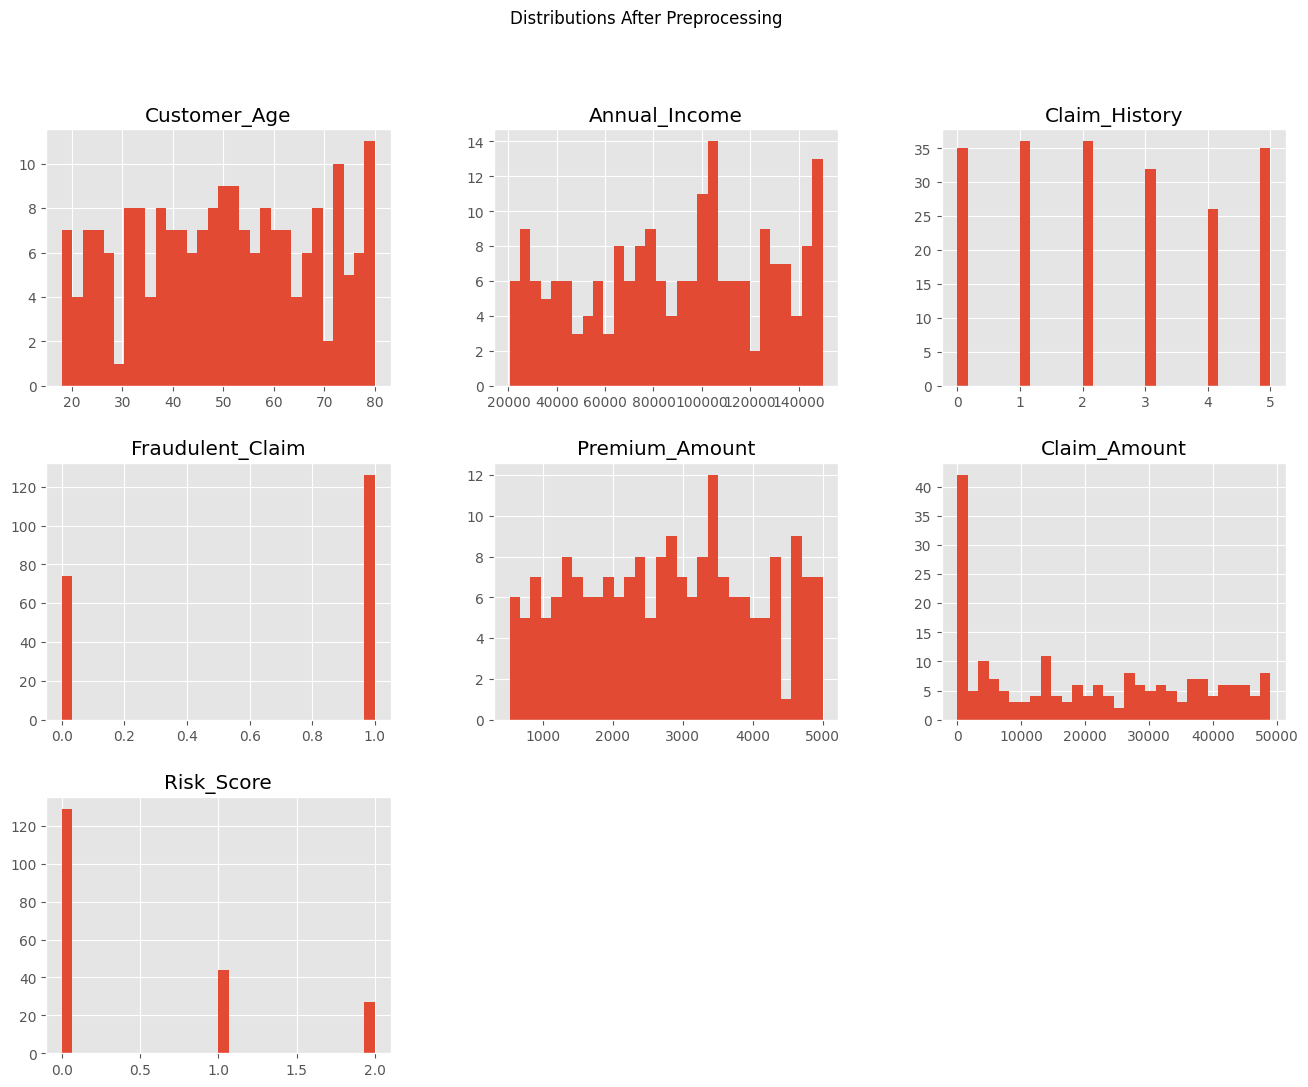

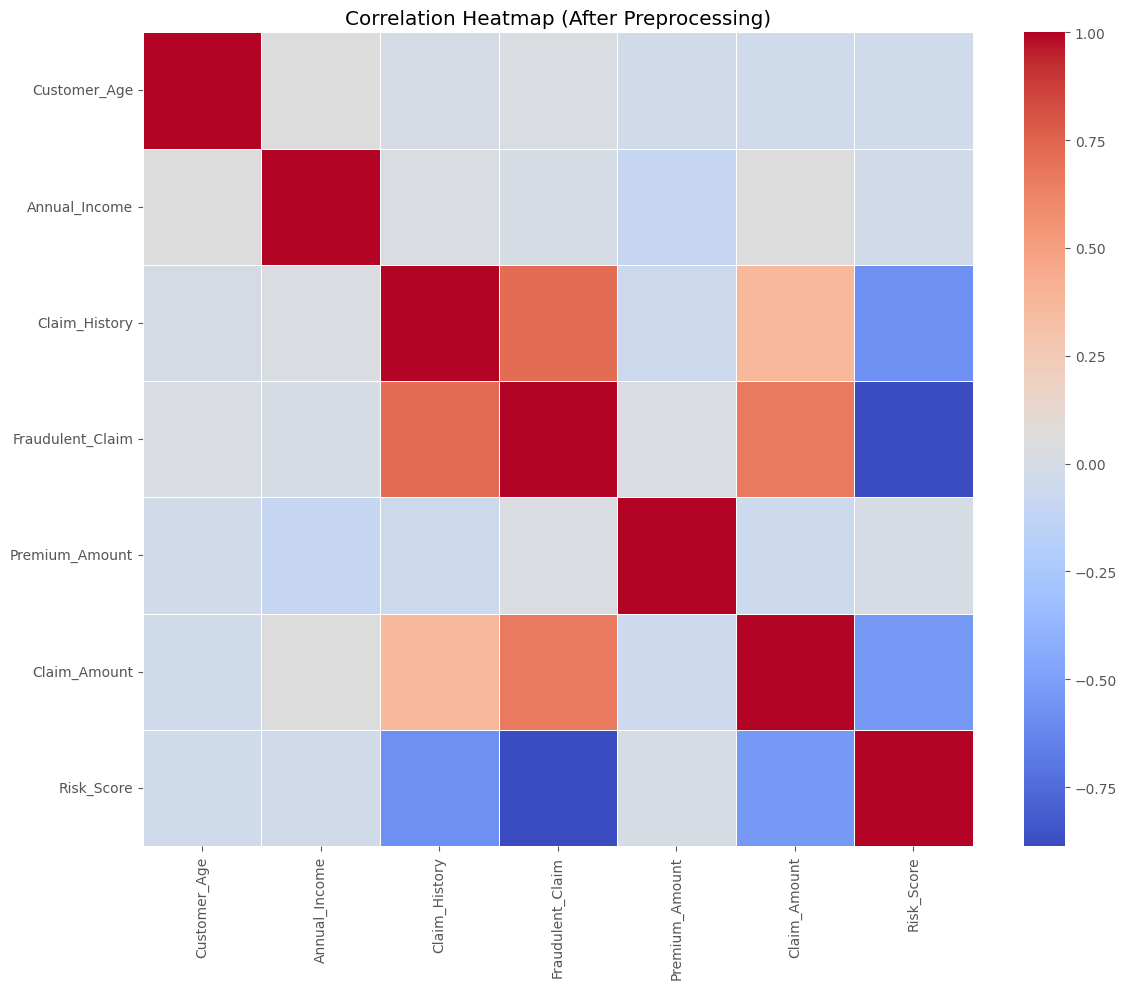


Summary Stats:


,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,49.965000,89296.591250,2.415000,0.630000,2778.942850,20088.759950,0.49000
std,17.599502,37982.812335,1.725591,0.484016,1256.256799,16361.980132,0.72285
min,18.000000,20460.940000,0.000000,0.000000,527.480000,0.000000,0.00000
25%,35.000000,57486.682500,1.000000,0.000000,1756.390000,3415.695000,0.00000
50%,51.000000,92939.875000,2.000000,1.000000,2801.220000,18620.775000,0.00000
75%,64.250000,119752.022500,4.000000,1.000000,3740.612500,34404.490000,1.00000
max,80.000000,149988.020000,5.000000,1.000000,4997.180000,49036.100000,2.00000



Data Types After Preprocessing:
Customer_Age              int64
Annual_Income           float64
Claim_History             int64
Fraudulent_Claim          int64
Premium_Amount          float64
                         ...   
Gender_Other               bool
Policy_Type_Health         bool
Policy_Type_Life           bool
Policy_Type_Property       bool
Risk_Score                int32
Length: 211, dtype: object


In [25]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

# ✅ Define the EDA + Preprocessing Function
def run_eda_pipeline(df, target_column=None, encode_method='onehot', drop_first=True):

    df = df.copy()
    
    # ✅ Check if target column exists
    if target_column and target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame. Available columns: {df.columns.tolist()}")

    print("🟢 EDA BEFORE PREPROCESSING\n")
    print("Shape:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())

    # 📊 Missing Values Visual
    msno.matrix(df)
    plt.title("Missing Values (Before)")
    plt.show()

    # 📈 Distribution Plots
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    df[num_cols].hist(figsize=(14, 8), bins=30)
    plt.suptitle("Numerical Feature Distributions (Before)")
    plt.show()

    # 📉 Count Plots for Categorical Features
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    if target_column and target_column in cat_cols:
        cat_cols.remove(target_column)

    for col in cat_cols:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Count Plot of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # -------------------------
    # 🧹 Preprocessing
    # -------------------------
    print("\n🛠️ PREPROCESSING...\n")
    df.drop_duplicates(inplace=True)

    # Fill missing values
    df.fillna(df.median(numeric_only=True), inplace=True)
    df.fillna(df.mode().iloc[0], inplace=True)

    # Encode Categorical
    df_processed = df.copy()

    if encode_method == 'onehot':
        if target_column:
            df_features = df_processed.drop(columns=[target_column])
            df_encoded = pd.get_dummies(df_features, drop_first=drop_first)
            df_processed = pd.concat([df_encoded, df[[target_column]]], axis=1)
        else:
            df_processed = pd.get_dummies(df_processed, drop_first=drop_first)

    elif encode_method == 'label':
        label_enc = LabelEncoder()
        for col in df_processed.select_dtypes(include='object').columns:
            if col != target_column:
                df_processed[col] = label_enc.fit_transform(df_processed[col])
    else:
        raise ValueError("encode_method must be 'onehot' or 'label'")

    # 🎯 Encode target column if categorical
    if target_column and df[target_column].dtype == 'object':
        df_processed[target_column] = LabelEncoder().fit_transform(df_processed[target_column])

    print("✅ Preprocessing Complete")
    print("New Shape:", df_processed.shape)

    # -------------------------
    # EDA After Preprocessing
    # -------------------------
    print("\n🟢 EDA AFTER PREPROCESSING\n")
    print("Missing Values After:", df_processed.isnull().sum().sum())

    df_processed.hist(figsize=(16, 12), bins=30)
    plt.suptitle("Distributions After Preprocessing")
    plt.show()

    # 🧊 Correlation Matrix Only for Numeric Columns
    numeric_df = df_processed.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap (After Preprocessing)")
    plt.tight_layout()
    plt.show()

    print("\nSummary Stats:")
    display(df_processed.describe())

     # ✅ Data types after preprocessing
    print("\nData Types After Preprocessing:")
    print(df_processed.dtypes)
    
    return df_processed

df = pd.read_csv("C:/Users/Administrator/insurance_risk_dataset.csv")
processed_df = run_eda_pipeline(df, target_column='Risk_Score', encode_method='onehot')

Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.96875

Generation 2 - Current best internal CV score: 0.96875

Generation 3 - Current best internal CV score: 0.9875

Generation 4 - Current best internal CV score: 0.9875

Generation 5 - Current best internal CV score: 0.9875

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
TPOT Model Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.91      1.00      0.95        10
           2       0.80      0.80      0.80         5

    accuracy                           0.95        40
   macro avg       0.90      0.92      0.91        40
weighted avg       0.95      0.95      0.95        40



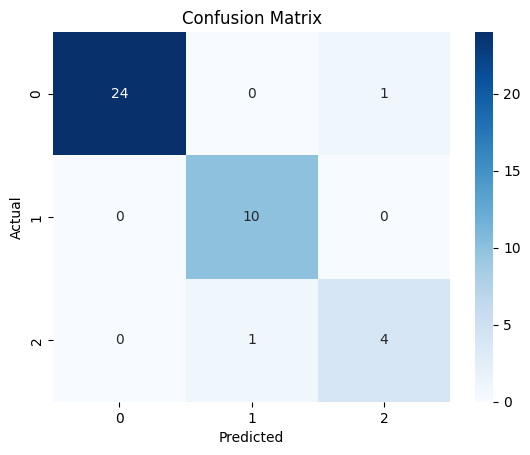

['Risk_Prediction_model.pkl']

In [11]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load your preprocessed dataset
df = pd.read_csv("C:/Users/Administrator/processed_insurance_risk_dataset.csv")

# Ensure all categorical variables are encoded
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
X = df.drop(columns=['Risk_Score'])  # Using 'Risk_Score' as the target column
y = df['Risk_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train TPOT
pipeline_optimizer = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
pipeline_optimizer.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline_optimizer.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"TPOT Model Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Export the best model as a pickle file
joblib.dump(pipeline_optimizer.fitted_pipeline_, "Risk_Prediction_model.pkl")
